<a href="https://colab.research.google.com/github/anjha1/INTERNSHIP-PROJECT/blob/main/Vodafone%20Idea%20Foundation/Data%20Analytics%20using%20AI-LLMs/Major%20Project/Major_Project_Doctors_Visit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:** Achhuta Nand Jha

**Major Project Name:** Doctors Visit

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Load the dataset**

In [3]:
df = pd.read_csv('/content/DoctorVisits-DA.csv')
df

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5185,5186,0,female,0.22,0.55,0,0,0,no,no,no,no,no
5186,5187,0,male,0.27,1.30,0,0,1,no,no,no,no,no
5187,5188,0,female,0.37,0.25,1,0,1,no,no,yes,no,no
5188,5189,0,female,0.52,0.65,0,0,0,no,no,no,no,no


**1. Number of Duplicates found in the Dataset**

In [4]:
duplicates = df.duplicated().sum()
print(f"Number of Duplicates: {duplicates}")

Number of Duplicates: 0


**2. Find out Total number of People based on their count of illness.**

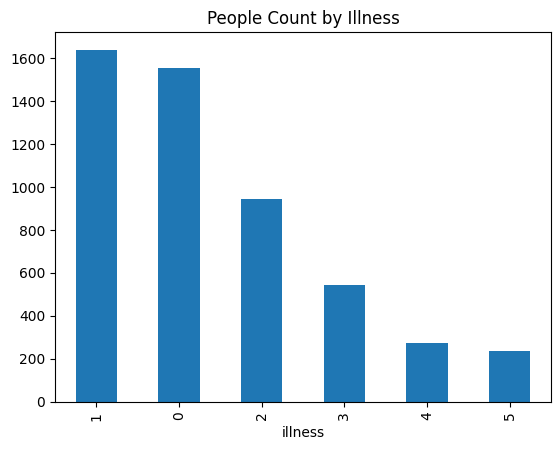

In [5]:
illness_count = df['illness'].value_counts()
illness_count.plot(kind='bar')
plt.title("People Count by Illness")
plt.show()

**3. Gender wise illness**

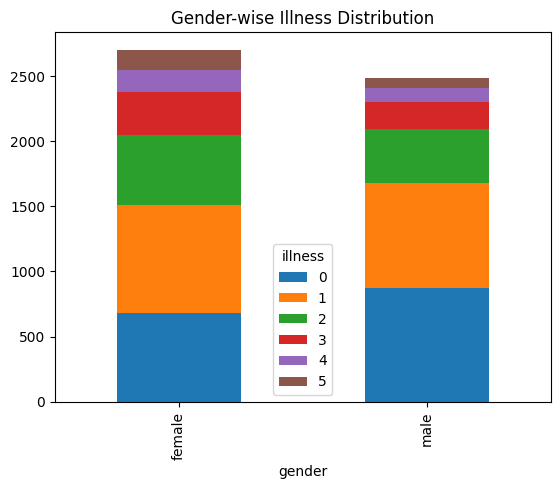

In [6]:
gender_illness = df.groupby(['gender', 'illness']).size().unstack()
gender_illness.plot(kind='bar', stacked=True)
plt.title("Gender-wise Illness Distribution")
plt.show()

**4. Analyse Maximum, Minimum and Medium income People**

Max Income: 1.5
Min Income: 0.0
Medium Income: 0.583159922928709


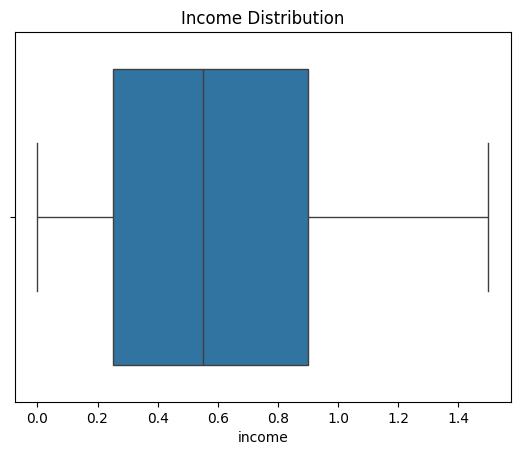

In [10]:
print("Max Income:", df['income'].max())
print("Min Income:", df['income'].min())
print("Medium Income:", df['income'].mean())
sns.boxplot(x='income', data=df)
plt.title("Income Distribution")
plt.show()

**5. Find the number of days of reduced activity of Male and Female separately due to illness.**

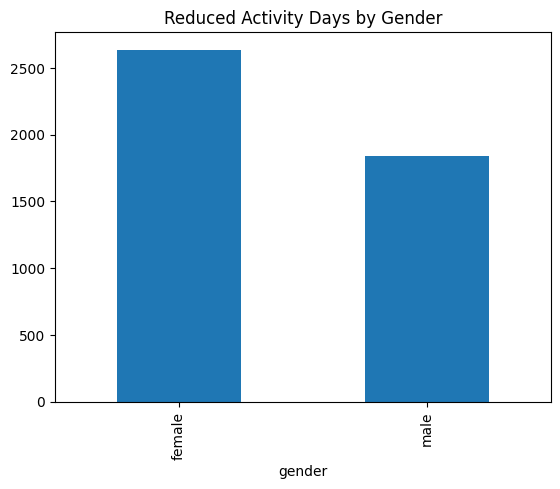

In [11]:
reduced_days_gender = df.groupby('gender')['reduced'].sum()
reduced_days_gender.plot(kind='bar')
plt.title("Reduced Activity Days by Gender")
plt.show()

**6. Visualize, is there any missing values in the dataset using Heat map chart**

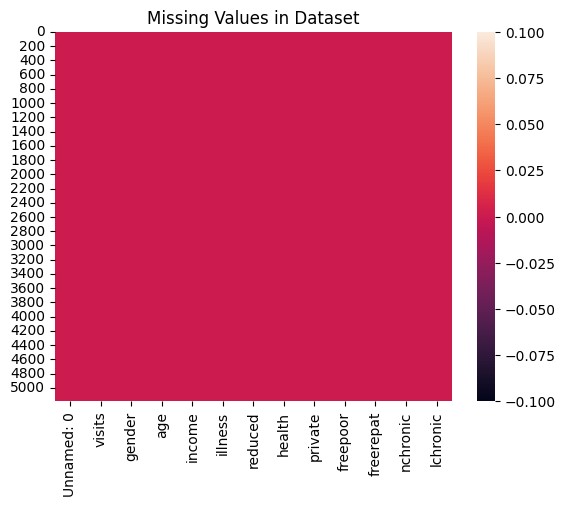

In [13]:
sns.heatmap(df.isnull())
plt.title("Missing Values in Dataset")
plt.show()

**7. Correlation between variables (means columns) of the dataset and identify which variables are mostly correlated.**

In [15]:
numerical_df = df.select_dtypes(include=['number'])

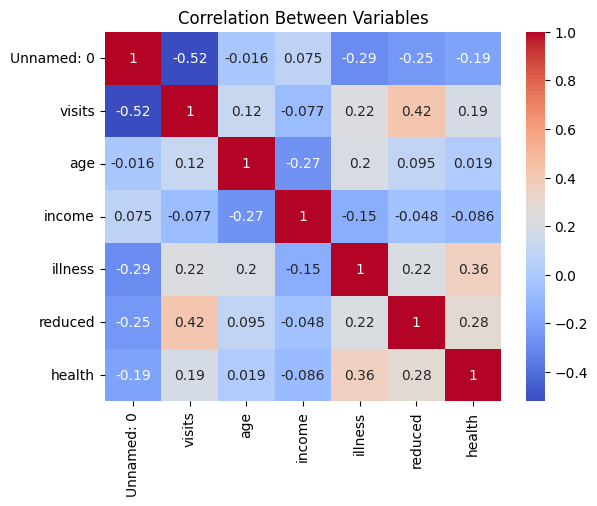

In [16]:
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Variables")
plt.show()

**8. Analyse how income of People affects the number of visits to the Hospital**

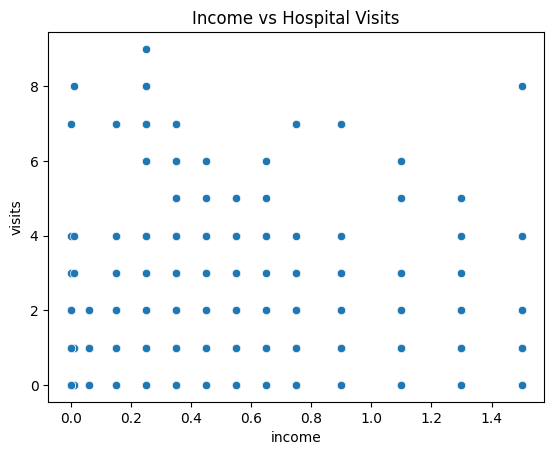

In [17]:
sns.scatterplot(x='income', y='visits', data=df)
plt.title("Income vs Hospital Visits")
plt.show()

**9. Count and Visualize the number of Males and Females affected by illness.**

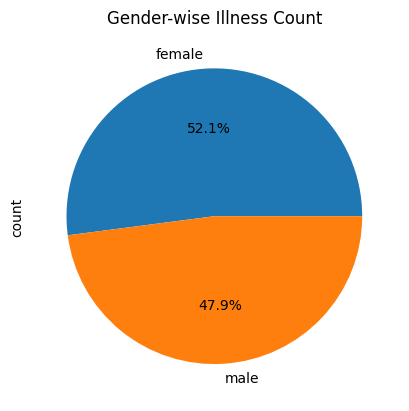

In [18]:
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Gender-wise Illness Count")
plt.show()

**10. Visualize the Percentage of People getting Govt. health insurance due to low income, due to old age. Also calculate the Percentage of People having Private Health Insurance.**

In [40]:
# Define thresholds for low income and old age
low_income_threshold = 0.5
old_age_threshold = 0.65
low_income_count = df[(df['income'] < low_income_threshold) & (df['freepoor'] == 'yes')].shape[0]
low_income_percentage = (low_income_count / len(df)) * 100
old_age_count = df[(df['age'] > old_age_threshold) & (df['freerepat'] == 'yes')].shape[0]
old_age_percentage = (old_age_count / len(df)) * 100
private_insurance_count = df[df['private'] == 'yes'].shape[0]
private_insurance_percentage = (private_insurance_count / len(df)) * 100
print(f"Percentage with Govt Insurance due to Low Income: {low_income_percentage:.2f}%")
print(f"Percentage with Govt Insurance due to Old Age: {old_age_percentage:.2f}%")
print(f"Percentage with Private Health Insurance: {private_insurance_percentage:.2f}%")


Percentage with Govt Insurance due to Low Income: 3.49%
Percentage with Govt Insurance due to Old Age: 13.82%
Percentage with Private Health Insurance: 44.28%


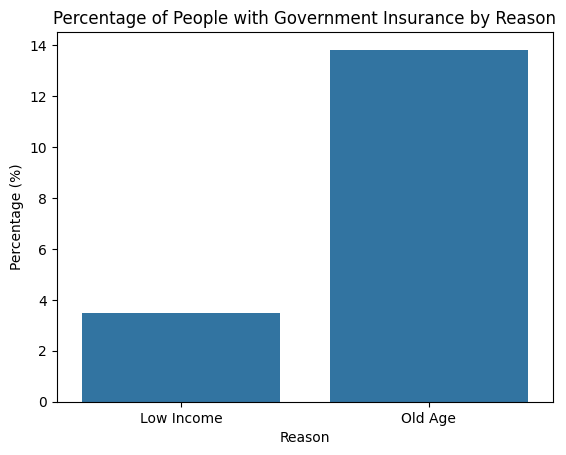

In [38]:
insurance_data = {
    'Reason': ['Low Income', 'Old Age'],
    'Percentage': [low_income_percentage, old_age_percentage]
}
sns.barplot(x='Reason', y='Percentage', data=pd.DataFrame(insurance_data))
plt.title("Percentage of People with Government Insurance by Reason")
plt.ylabel("Percentage (%)")
plt.show()


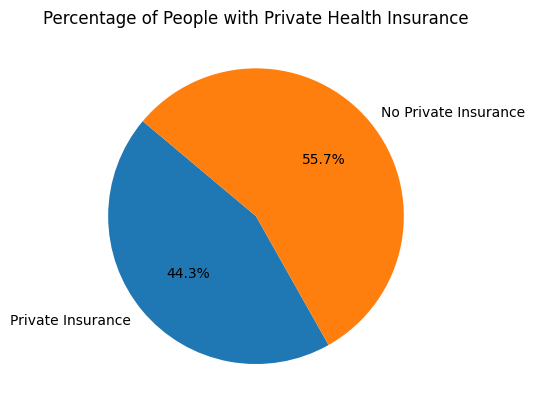

In [39]:
insurance_types = ['Private Insurance', 'No Private Insurance']
insurance_values = [private_insurance_percentage, 100 - private_insurance_percentage]
plt.pie(insurance_values, labels=insurance_types, autopct='%1.1f%%', startangle=140)
plt.title("Percentage of People with Private Health Insurance")
plt.show()

**11. Plot bar chart to analyse the reduced days of activity due to illness based on Gender**

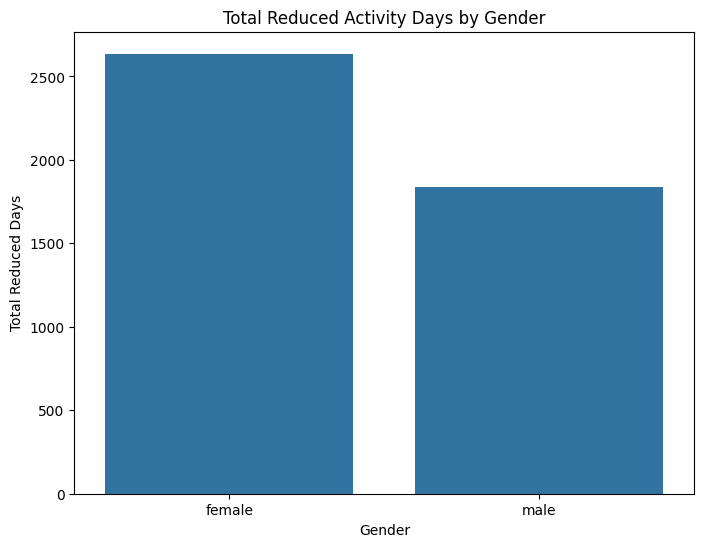

In [23]:
reduced_days_gender = df.groupby('gender')['reduced'].sum().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='gender', y='reduced', data=reduced_days_gender)
plt.title('Total Reduced Activity Days by Gender')
plt.ylabel('Total Reduced Days')
plt.xlabel('Gender')
plt.show()


<ipython-input-25-ef8a2c3cfd1f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='reduced', data=avg_reduced_days_gender, palette='Set3')


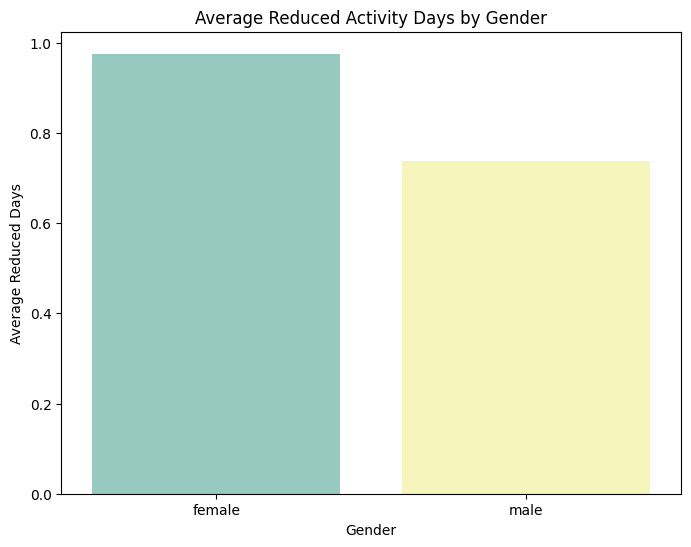

In [25]:
avg_reduced_days_gender = df.groupby('gender')['reduced'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='gender', y='reduced', data=avg_reduced_days_gender, palette='Set3')
plt.title('Average Reduced Activity Days by Gender')
plt.ylabel('Average Reduced Days')
plt.xlabel('Gender')
plt.show()


**12. Relation between Health status and Activity reduction using heat map chart.**

In [28]:
print(df.columns)

Index(['Unnamed: 0', 'visits', 'gender', 'age', 'income', 'illness', 'reduced',
       'health', 'private', 'freepoor', 'freerepat', 'nchronic', 'lchronic'],
      dtype='object')


In [29]:
pivot_table = df.pivot_table(index='health', columns='gender', values='reduced', aggfunc='sum')


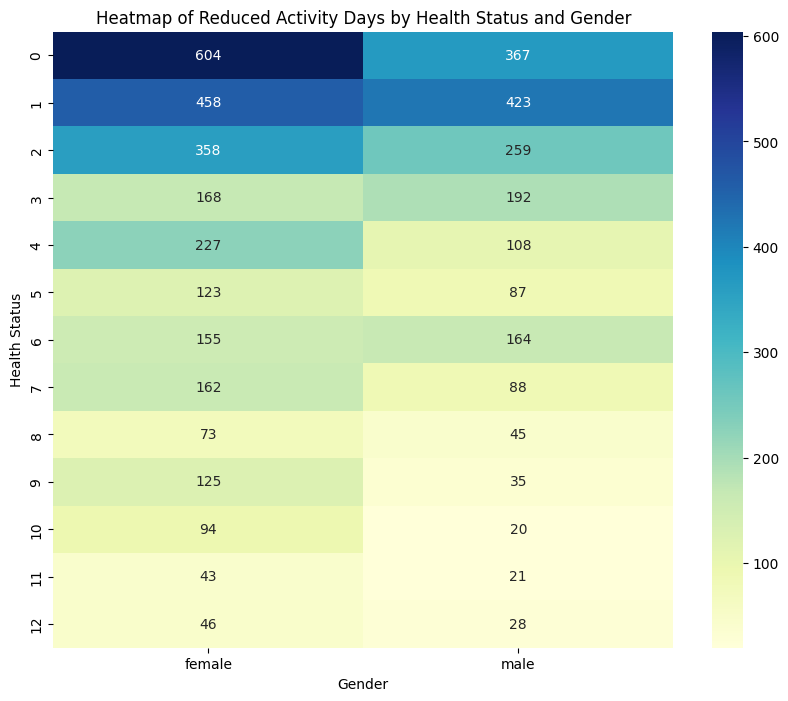

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Heatmap of Reduced Activity Days by Health Status and Gender')
plt.ylabel('Health Status')
plt.xlabel('Gender')
plt.show()

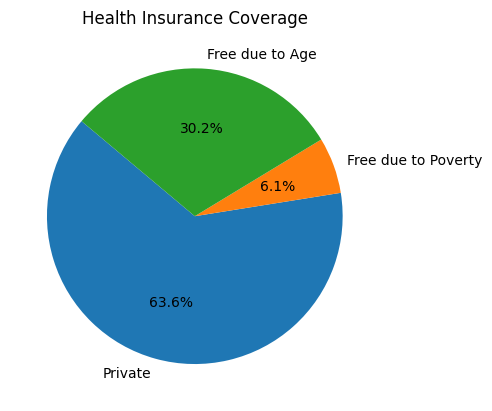

In [41]:
# Corrected Insurance Coverage Analysis
insurance_data = {
    'Private': df['private'].value_counts().get('yes', 0),
    'Free due to Poverty': df['freepoor'].value_counts().get('yes', 0),
    'Free due to Age': df['freerepat'].value_counts().get('yes', 0)
}
pd.Series(insurance_data).plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Health Insurance Coverage")
plt.show()


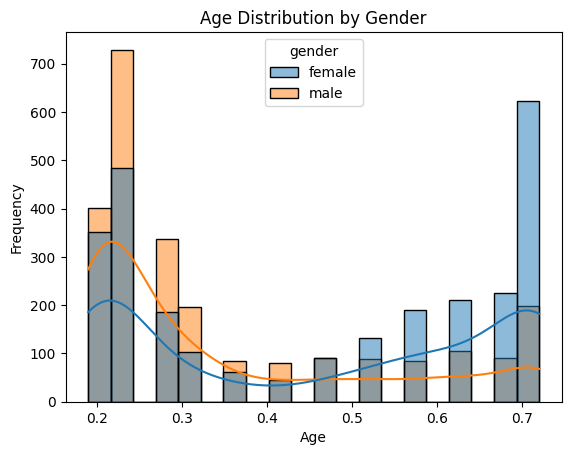

In [42]:
# Age Distribution by Gender
sns.histplot(data=df, x='age', hue='gender', kde=True, bins=20)
plt.title("Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [45]:
df

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5185,5186,0,female,0.22,0.55,0,0,0,no,no,no,no,no
5186,5187,0,male,0.27,1.30,0,0,1,no,no,no,no,no
5187,5188,0,female,0.37,0.25,1,0,1,no,no,yes,no,no
5188,5189,0,female,0.52,0.65,0,0,0,no,no,no,no,no


In [44]:
df.columns

Index(['Unnamed: 0', 'visits', 'gender', 'age', 'income', 'illness', 'reduced',
       'health', 'private', 'freepoor', 'freerepat', 'nchronic', 'lchronic'],
      dtype='object')

<ipython-input-47-89d3facf1dcd>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reduced_days_age_group = df.groupby('age_group')['reduced'].sum()


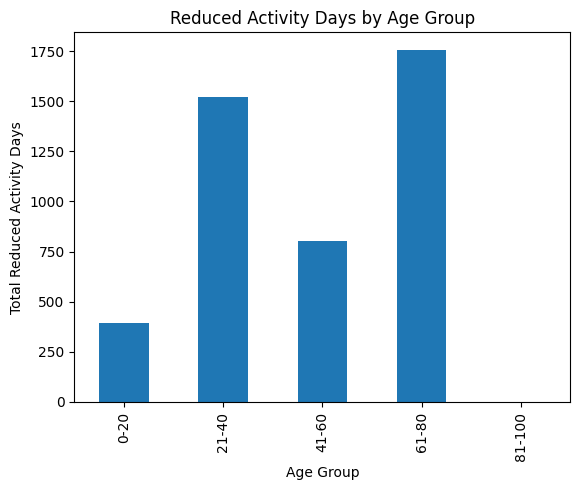

In [47]:
# Adding an Age Group Column
df['age_group'] = pd.cut(df['age'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

# Reduced Activity Days by Age Group
reduced_days_age_group = df.groupby('age_group')['reduced'].sum()
reduced_days_age_group.plot(kind='bar')
plt.title("Reduced Activity Days by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Reduced Activity Days")
plt.show()


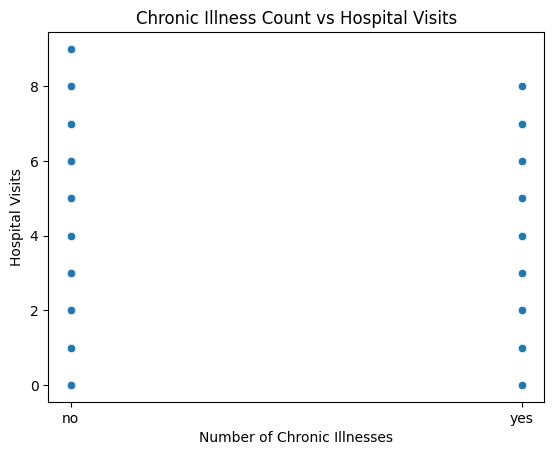

In [48]:
# Scatter plot of Visits vs Chronic Illness
sns.scatterplot(x='nchronic', y='visits', data=df)
plt.title("Chronic Illness Count vs Hospital Visits")
plt.xlabel("Number of Chronic Illnesses")
plt.ylabel("Hospital Visits")
plt.show()


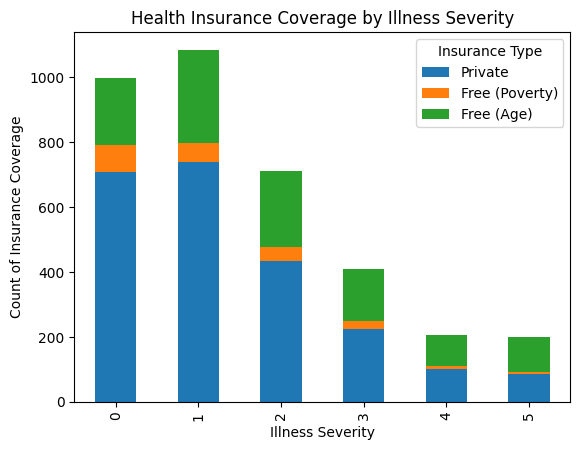

In [49]:
# Illness Severity vs Health Insurance Coverage
insurance_illness = df.groupby(['illness'])[['private', 'freepoor', 'freerepat']].apply(lambda x: (x == 'yes').sum())
insurance_illness.plot(kind='bar', stacked=True)
plt.title("Health Insurance Coverage by Illness Severity")
plt.xlabel("Illness Severity")
plt.ylabel("Count of Insurance Coverage")
plt.legend(title="Insurance Type", labels=["Private", "Free (Poverty)", "Free (Age)"])
plt.show()


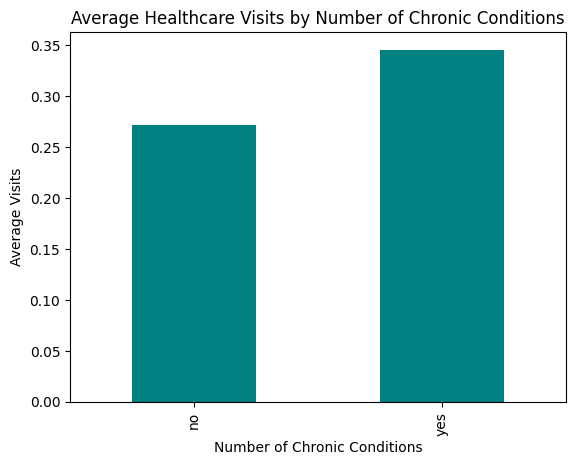

In [50]:
# Average Visits per Chronic Condition Count
chronic_visits = df.groupby('nchronic')['visits'].mean()
chronic_visits.plot(kind='bar', color='teal')
plt.title("Average Healthcare Visits by Number of Chronic Conditions")
plt.xlabel("Number of Chronic Conditions")
plt.ylabel("Average Visits")
plt.show()


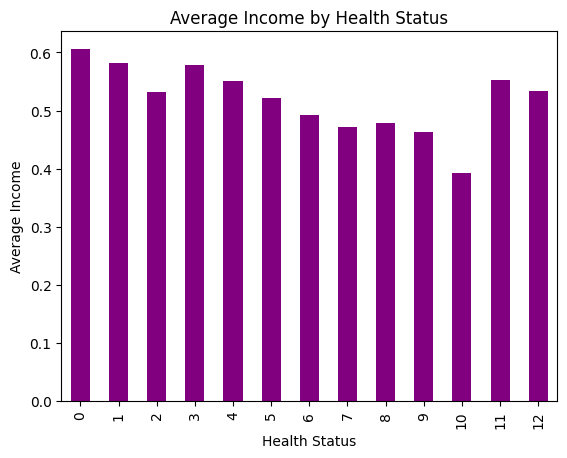

In [51]:
# Average Income by Health Status
income_health = df.groupby('health')['income'].mean()
income_health.plot(kind='bar', color='purple')
plt.title("Average Income by Health Status")
plt.xlabel("Health Status")
plt.ylabel("Average Income")
plt.show()


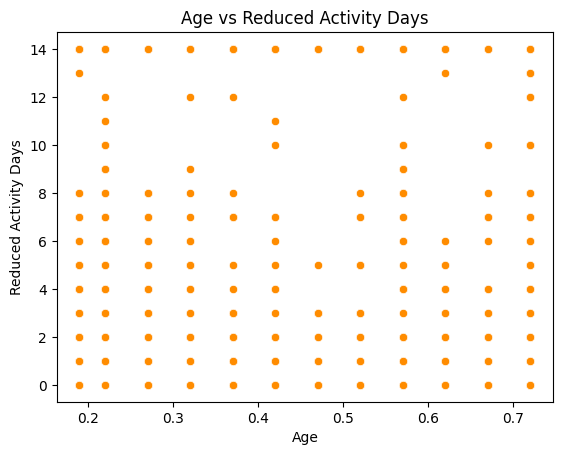

In [52]:
# Scatter plot of Age vs Reduced Activity Days
sns.scatterplot(x='age', y='reduced', data=df, color='darkorange')
plt.title("Age vs Reduced Activity Days")
plt.xlabel("Age")
plt.ylabel("Reduced Activity Days")
plt.show()


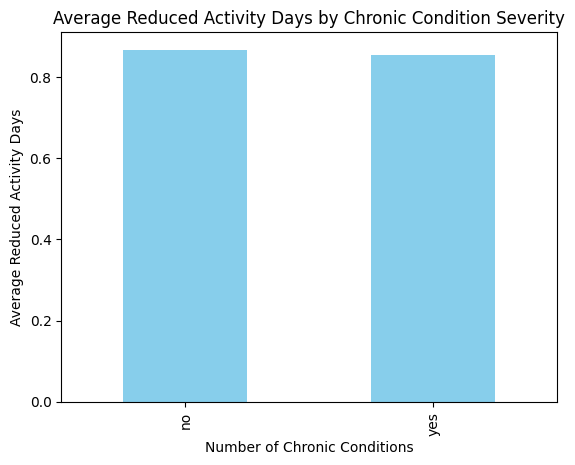

In [53]:
# Reduced Activity Days vs Chronic Condition Severity
chronic_reduced = df.groupby('nchronic')['reduced'].mean()
chronic_reduced.plot(kind='bar', color='skyblue')
plt.title("Average Reduced Activity Days by Chronic Condition Severity")
plt.xlabel("Number of Chronic Conditions")
plt.ylabel("Average Reduced Activity Days")
plt.show()


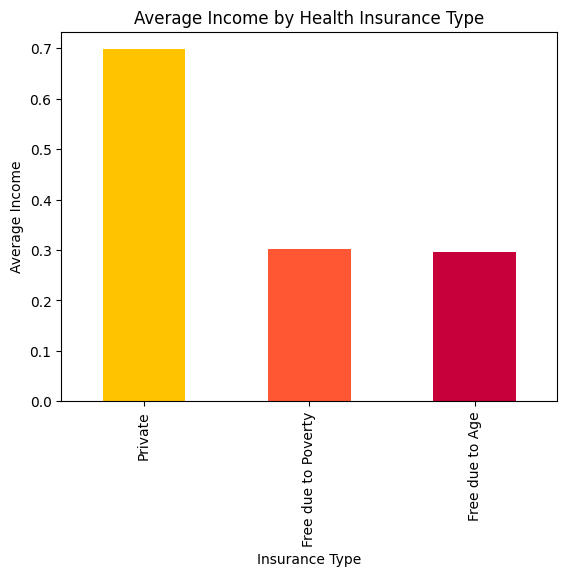

In [54]:
# Income by Health Insurance Type
insurance_income = {
    'Private': df[df['private'] == 'yes']['income'].mean(),
    'Free due to Poverty': df[df['freepoor'] == 'yes']['income'].mean(),
    'Free due to Age': df[df['freerepat'] == 'yes']['income'].mean()
}
pd.Series(insurance_income).plot(kind='bar', color=['#FFC300', '#FF5733', '#C70039'])
plt.title("Average Income by Health Insurance Type")
plt.xlabel("Insurance Type")
plt.ylabel("Average Income")
plt.show()


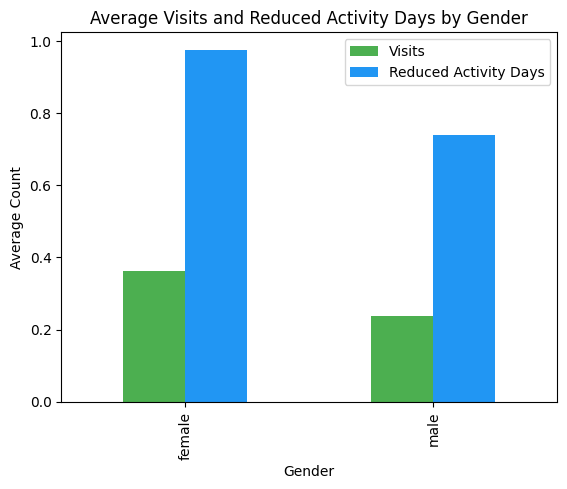

In [55]:
# Visits and Reduced Activity Days by Gender
gender_activity_visits = df.groupby('gender')[['visits', 'reduced']].mean()
gender_activity_visits.plot(kind='bar', color=['#4CAF50', '#2196F3'])
plt.title("Average Visits and Reduced Activity Days by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Count")
plt.legend(["Visits", "Reduced Activity Days"])
plt.show()


<ipython-input-56-29fa714d05d4>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_visits = df.groupby('age_group')['visits'].mean()


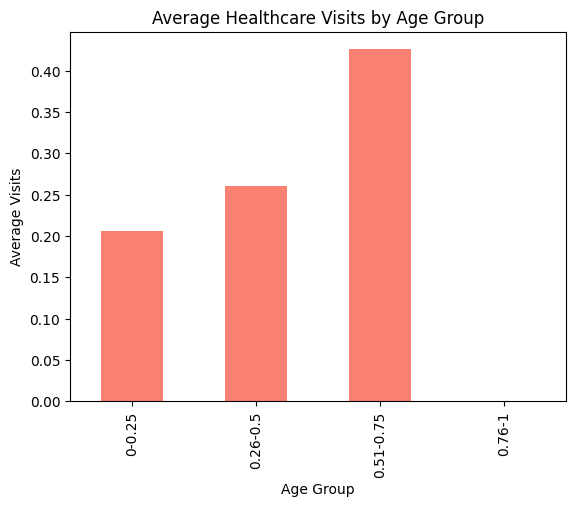

In [56]:
# Create age groups and calculate average visits per age group
df['age_group'] = pd.cut(df['age'], bins=[0, 0.25, 0.5, 0.75, 1], labels=["0-0.25", "0.26-0.5", "0.51-0.75", "0.76-1"])
age_group_visits = df.groupby('age_group')['visits'].mean()
age_group_visits.plot(kind='bar', color='salmon')
plt.title("Average Healthcare Visits by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Visits")
plt.show()


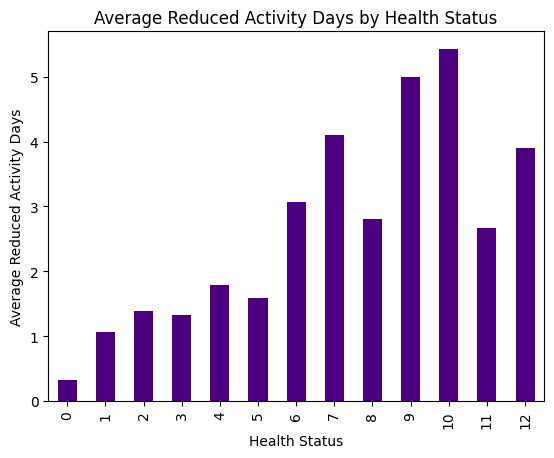

In [58]:
# Average Reduced Activity Days by Health Status
health_reduced_days = df.groupby('health')['reduced'].mean()
health_reduced_days.plot(kind='bar', color='indigo')
plt.title("Average Reduced Activity Days by Health Status")
plt.xlabel("Health Status")
plt.ylabel("Average Reduced Activity Days")
plt.show()


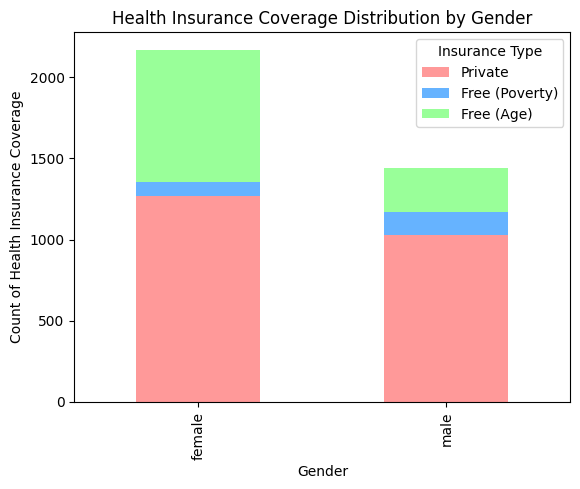

In [60]:
# Health Insurance Type Distribution by Gender
gender_insurance = df.groupby('gender')[['private', 'freepoor', 'freerepat']].apply(lambda x: (x == 'yes').sum())
gender_insurance.plot(kind='bar', stacked=True, color=['#FF9999', '#66B3FF', '#99FF99'])
plt.title("Health Insurance Coverage Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count of Health Insurance Coverage")
plt.legend(title="Insurance Type", labels=["Private", "Free (Poverty)", "Free (Age)"])
plt.show()


<ipython-input-61-28e4160ea4dc>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_illness = df.groupby('age_group')['illness'].mean()


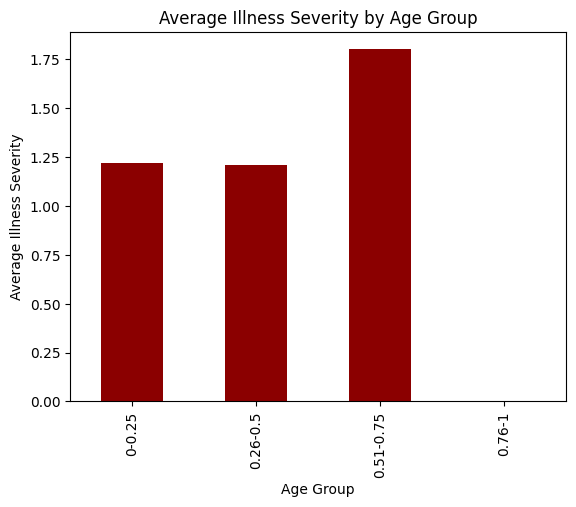

In [61]:
# Average Illness Severity by Age Group
age_group_illness = df.groupby('age_group')['illness'].mean()
age_group_illness.plot(kind='bar', color='darkred')
plt.title("Average Illness Severity by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Illness Severity")
plt.show()


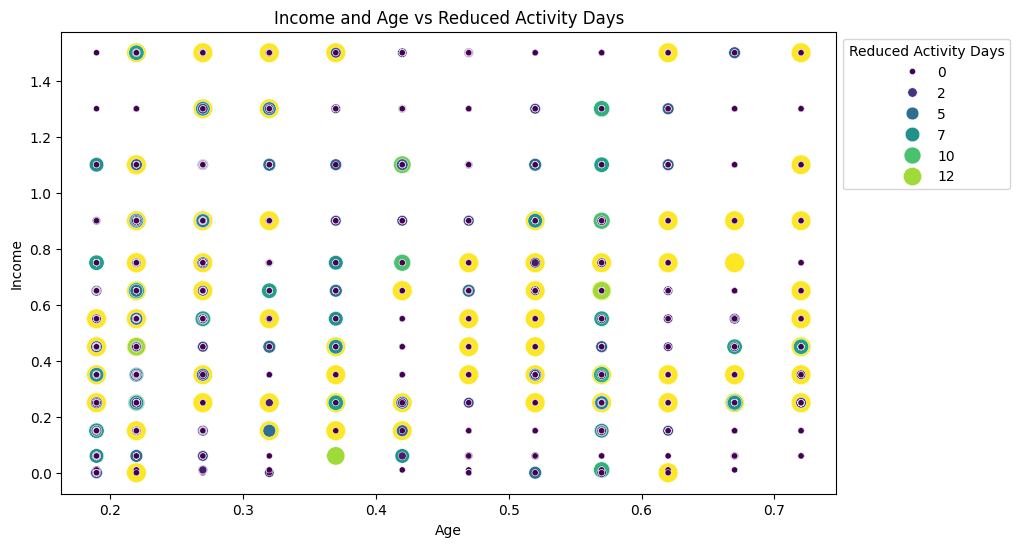

In [62]:
# Scatter plot for Age and Income vs Reduced Activity Days
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='income', size='reduced', hue='reduced', data=df, palette='viridis', sizes=(20, 200))
plt.title("Income and Age vs Reduced Activity Days")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend(title="Reduced Activity Days", bbox_to_anchor=(1, 1))
plt.show()


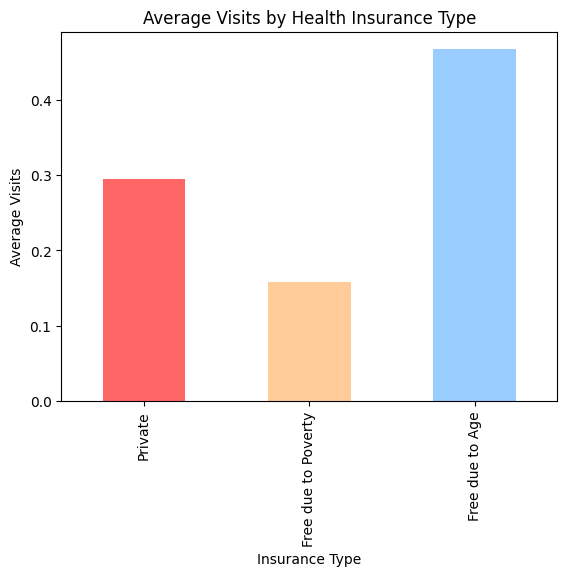

In [63]:
# Average Visits by Health Insurance Type
insurance_visits = {
    'Private': df[df['private'] == 'yes']['visits'].mean(),
    'Free due to Poverty': df[df['freepoor'] == 'yes']['visits'].mean(),
    'Free due to Age': df[df['freerepat'] == 'yes']['visits'].mean()
}
pd.Series(insurance_visits).plot(kind='bar', color=['#FF6666', '#FFCC99', '#99CCFF'])
plt.title("Average Visits by Health Insurance Type")
plt.xlabel("Insurance Type")
plt.ylabel("Average Visits")
plt.show()


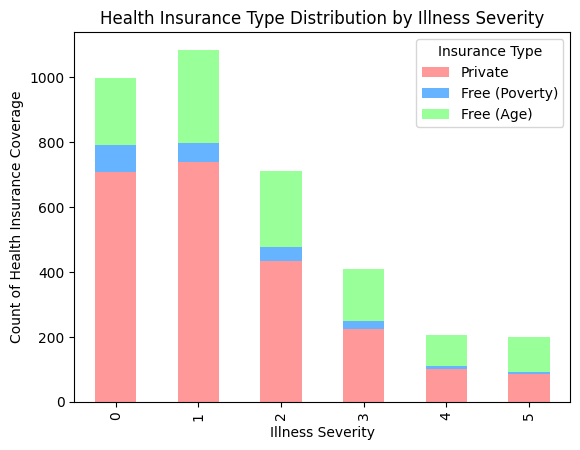

In [64]:
# Health insurance type distribution by illness severity
insurance_by_illness = df.groupby('illness')[['private', 'freepoor', 'freerepat']].apply(lambda x: (x == 'yes').sum())
insurance_by_illness.plot(kind='bar', stacked=True, color=['#FF9999', '#66B3FF', '#99FF99'])
plt.title("Health Insurance Type Distribution by Illness Severity")
plt.xlabel("Illness Severity")
plt.ylabel("Count of Health Insurance Coverage")
plt.legend(title="Insurance Type", labels=["Private", "Free (Poverty)", "Free (Age)"])
plt.show()


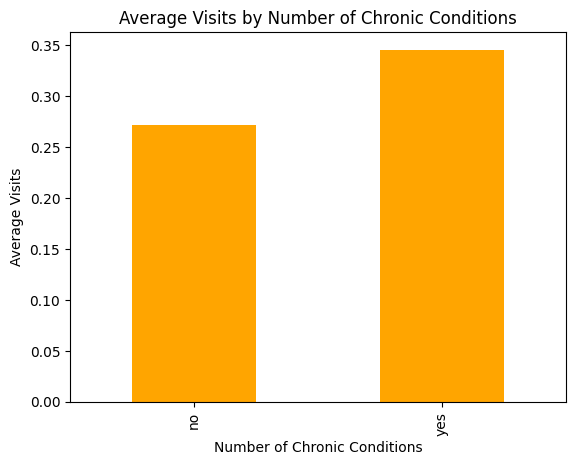

In [65]:
# Average number of visits by chronic condition
chronic_visits = df.groupby('nchronic')['visits'].mean()
chronic_visits.plot(kind='bar', color='orange')
plt.title("Average Visits by Number of Chronic Conditions")
plt.xlabel("Number of Chronic Conditions")
plt.ylabel("Average Visits")
plt.show()


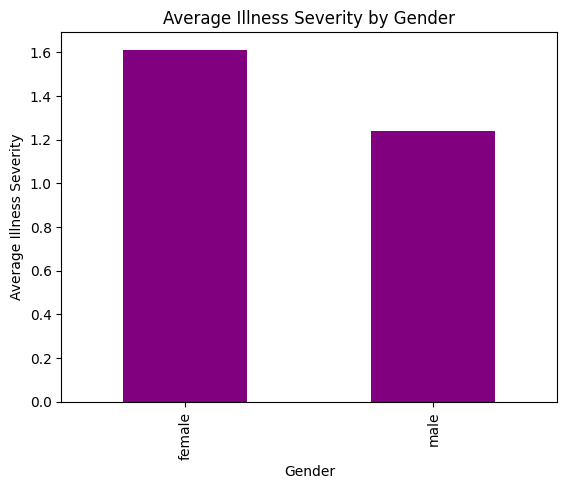

In [66]:
# Illness severity by gender
gender_illness_severity = df.groupby('gender')['illness'].mean()
gender_illness_severity.plot(kind='bar', color='purple')
plt.title("Average Illness Severity by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Illness Severity")
plt.show()


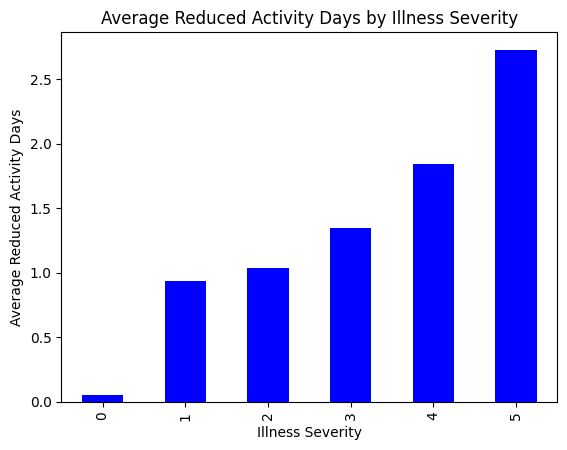

In [67]:
# Average reduced activity days by illness severity
illness_reduced_days = df.groupby('illness')['reduced'].mean()
illness_reduced_days.plot(kind='bar', color='blue')
plt.title("Average Reduced Activity Days by Illness Severity")
plt.xlabel("Illness Severity")
plt.ylabel("Average Reduced Activity Days")
plt.show()


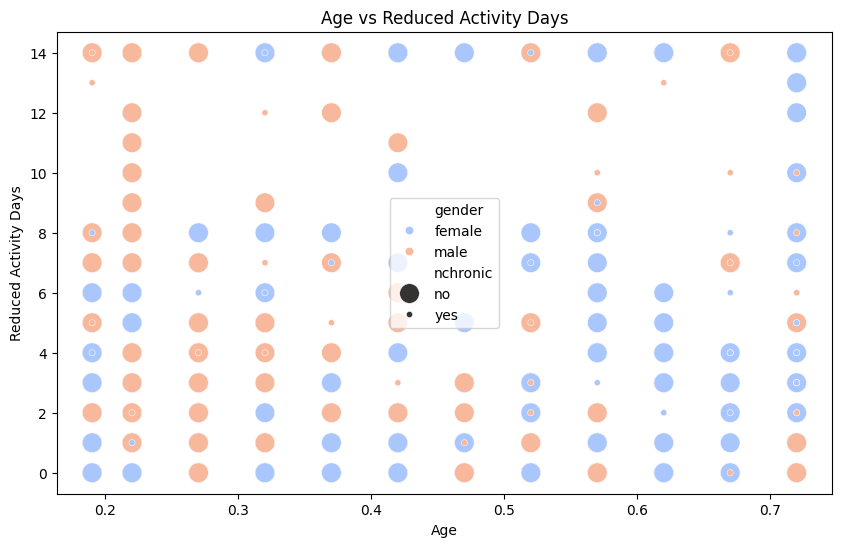

In [69]:
# Scatter plot of age vs reduced activity days
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='reduced', data=df, hue='gender', palette='coolwarm', size='nchronic', sizes=(20, 200))
plt.title("Age vs Reduced Activity Days")
plt.xlabel("Age")
plt.ylabel("Reduced Activity Days")
plt.show()


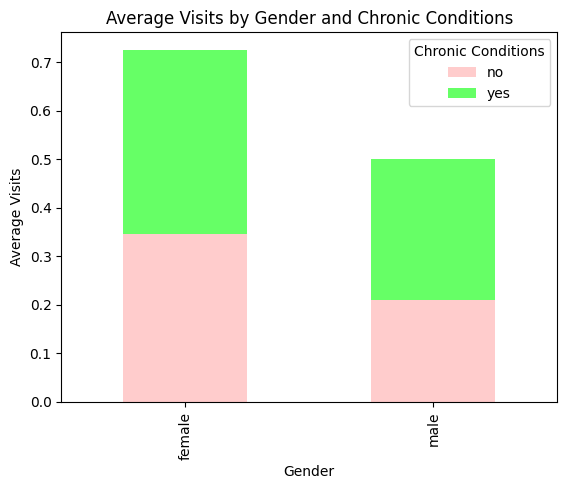

In [70]:
# Visits by gender and number of chronic conditions
gender_chronic_visits = df.groupby(['gender', 'nchronic'])['visits'].mean().unstack()
gender_chronic_visits.plot(kind='bar', stacked=True, color=['#FFCCCC', '#66FF66', '#FFCC99'])
plt.title("Average Visits by Gender and Chronic Conditions")
plt.xlabel("Gender")
plt.ylabel("Average Visits")
plt.legend(title="Chronic Conditions")
plt.show()


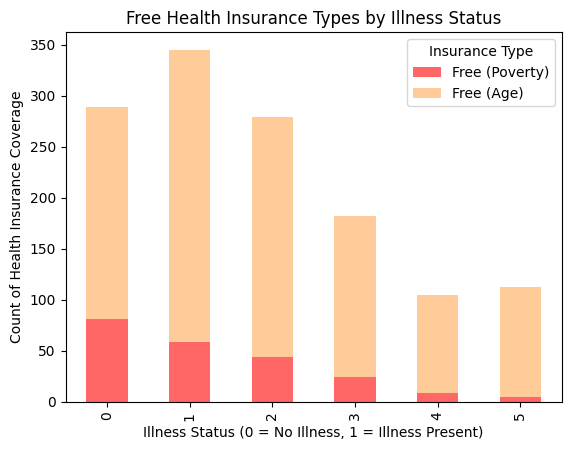

In [71]:
# Compare free health insurance types by illness status
free_insurance_by_illness = df.groupby('illness')[['freepoor', 'freerepat']].apply(lambda x: (x == 'yes').sum())
free_insurance_by_illness.plot(kind='bar', stacked=True, color=['#FF6666', '#FFCC99'])
plt.title("Free Health Insurance Types by Illness Status")
plt.xlabel("Illness Status (0 = No Illness, 1 = Illness Present)")
plt.ylabel("Count of Health Insurance Coverage")
plt.legend(title="Insurance Type", labels=["Free (Poverty)", "Free (Age)"])
plt.show()


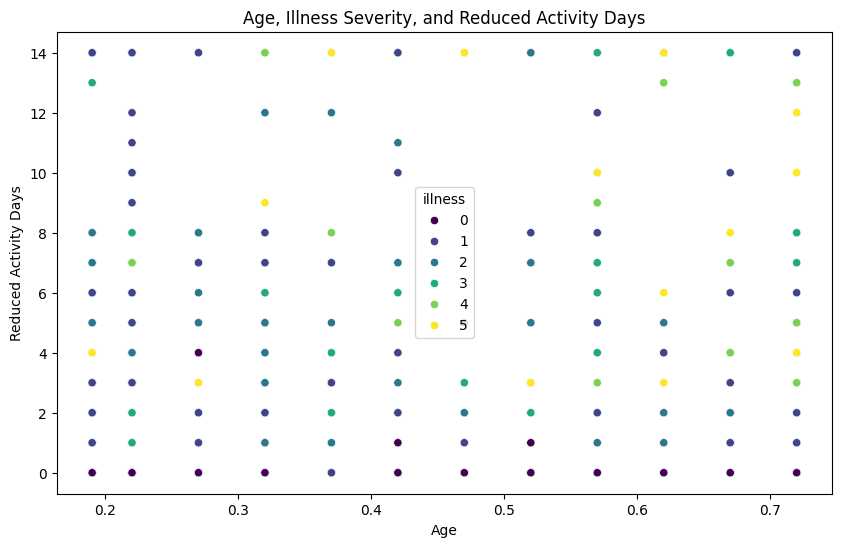

In [72]:
# Illness severity and age vs reduced activity days
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='reduced', data=df, hue='illness', palette='viridis')
plt.title("Age, Illness Severity, and Reduced Activity Days")
plt.xlabel("Age")
plt.ylabel("Reduced Activity Days")
plt.show()


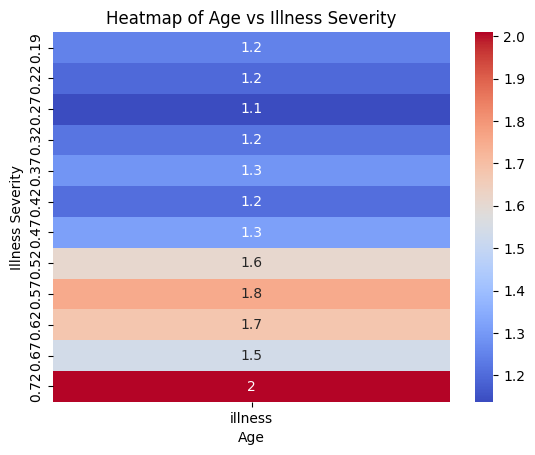

In [73]:
# Heatmap of age vs illness severity
age_illness_matrix = pd.pivot_table(df, values='illness', index='age', aggfunc='mean')
sns.heatmap(age_illness_matrix, cmap='coolwarm', annot=True)
plt.title("Heatmap of Age vs Illness Severity")
plt.xlabel("Age")
plt.ylabel("Illness Severity")
plt.show()


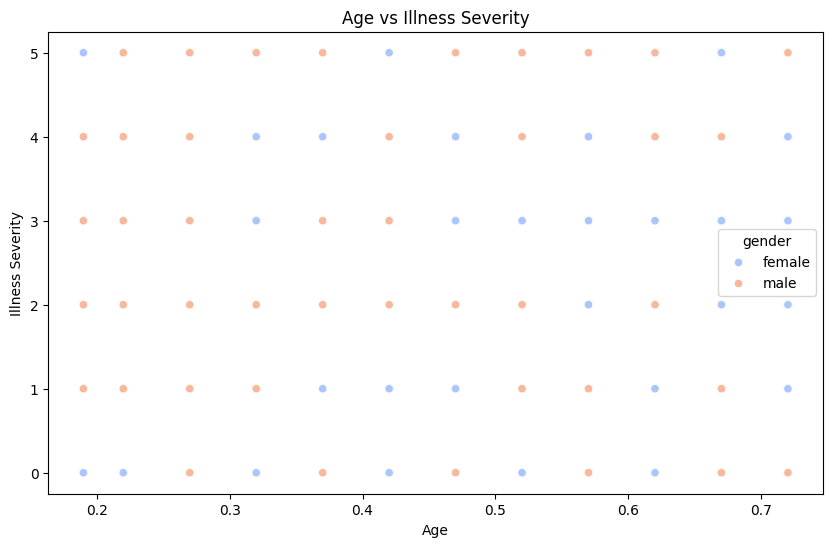

In [74]:
# Scatter plot of age vs illness severity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='illness', data=df, hue='gender', palette='coolwarm')
plt.title("Age vs Illness Severity")
plt.xlabel("Age")
plt.ylabel("Illness Severity")
plt.show()


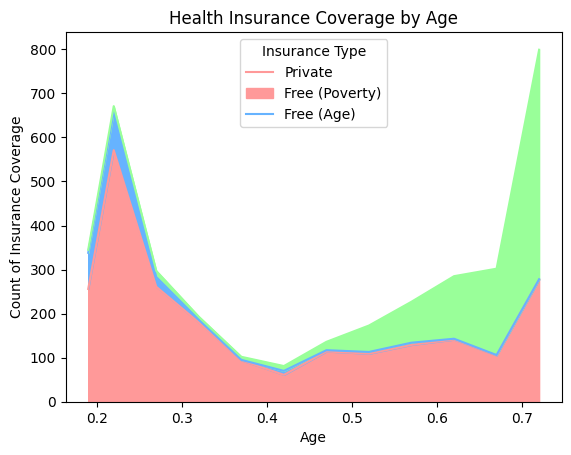

In [75]:
# Health insurance coverage by age
age_insurance = df.groupby('age')[['private', 'freepoor', 'freerepat']].apply(lambda x: (x == 'yes').sum())
age_insurance.plot(kind='area', stacked=True, color=['#FF9999', '#66B3FF', '#99FF99'])
plt.title("Health Insurance Coverage by Age")
plt.xlabel("Age")
plt.ylabel("Count of Insurance Coverage")
plt.legend(title="Insurance Type", labels=["Private", "Free (Poverty)", "Free (Age)"])
plt.show()


<ipython-input-76-f4e98d5dbce9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='illness', y='reduced', data=df, palette='Set2')


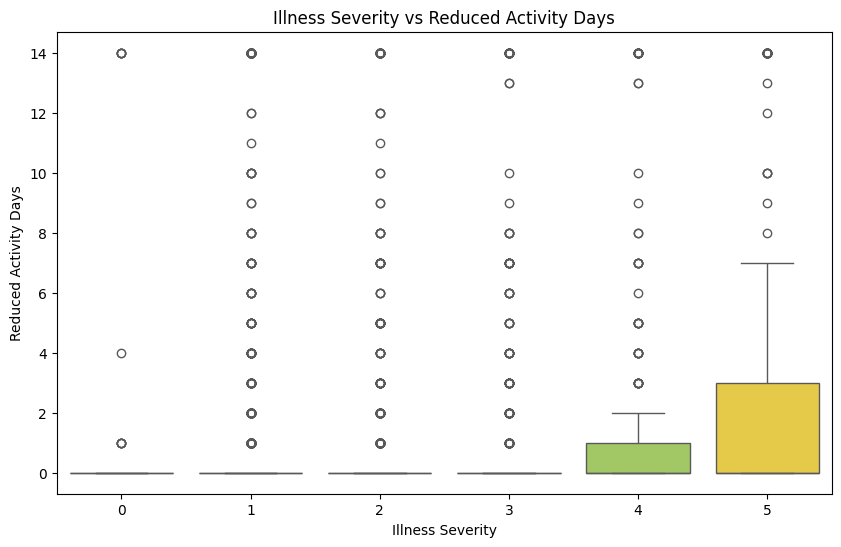

In [76]:
# Illness severity vs reduced activity days
plt.figure(figsize=(10, 6))
sns.boxplot(x='illness', y='reduced', data=df, palette='Set2')
plt.title("Illness Severity vs Reduced Activity Days")
plt.xlabel("Illness Severity")
plt.ylabel("Reduced Activity Days")
plt.show()


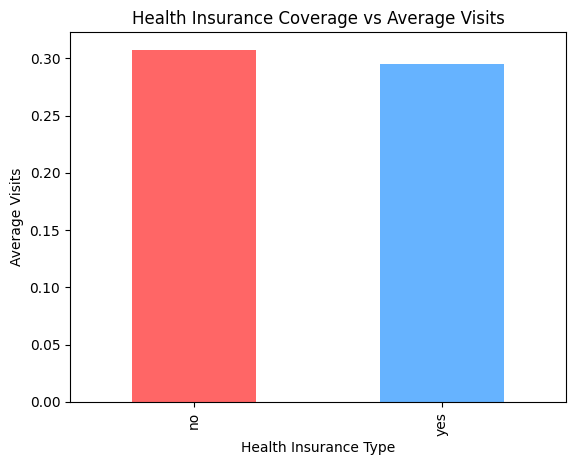

In [77]:
# Health insurance coverage vs visits
insurance_visits = df.groupby('private')['visits'].mean()
insurance_visits.plot(kind='bar', color=['#FF6666', '#66B3FF', '#99FF99'])
plt.title("Health Insurance Coverage vs Average Visits")
plt.xlabel("Health Insurance Type")
plt.ylabel("Average Visits")
plt.show()


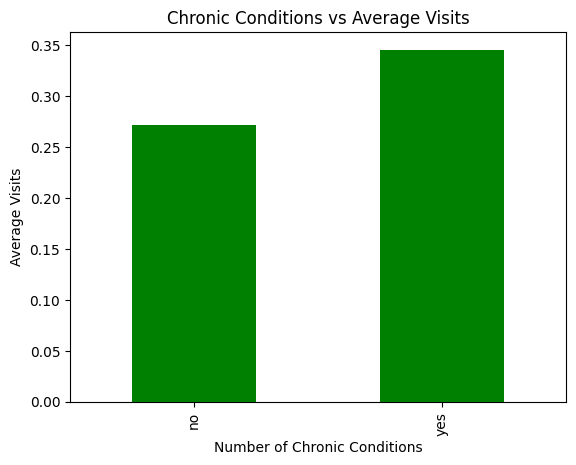

In [78]:
# Chronic conditions vs visits
chronic_visits = df.groupby('nchronic')['visits'].mean()
chronic_visits.plot(kind='bar', color='green')
plt.title("Chronic Conditions vs Average Visits")
plt.xlabel("Number of Chronic Conditions")
plt.ylabel("Average Visits")
plt.show()


<ipython-input-79-52aacfef638b>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_illness = df.groupby(age_groups)['illness'].mean()


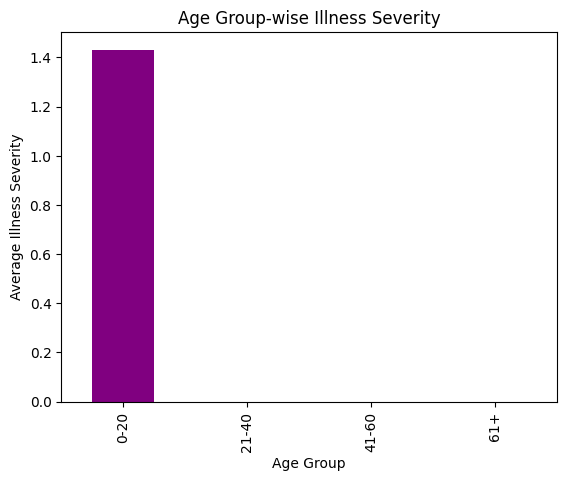

In [79]:
# Create age groups
age_groups = pd.cut(df['age'], bins=[0, 20, 40, 60, 100], labels=['0-20', '21-40', '41-60', '61+'])
age_group_illness = df.groupby(age_groups)['illness'].mean()
age_group_illness.plot(kind='bar', color='purple')
plt.title("Age Group-wise Illness Severity")
plt.xlabel("Age Group")
plt.ylabel("Average Illness Severity")
plt.show()


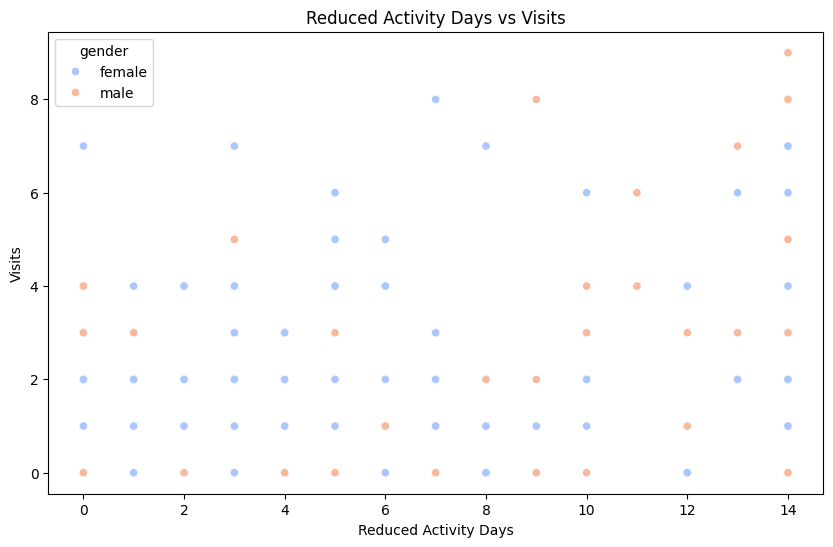

In [80]:
# Scatter plot: Reduced Activity Days vs Visits
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reduced', y='visits', data=df, hue='gender', palette='coolwarm')
plt.title("Reduced Activity Days vs Visits")
plt.xlabel("Reduced Activity Days")
plt.ylabel("Visits")
plt.show()


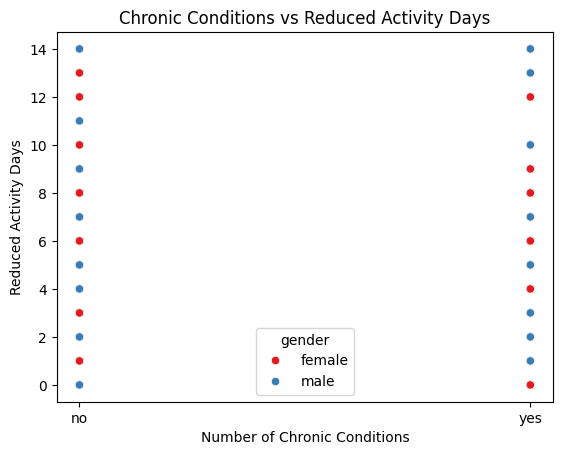

In [81]:
# Correlation between chronic conditions and reduced activity days
sns.scatterplot(x='nchronic', y='reduced', data=df, hue='gender', palette='Set1')
plt.title("Chronic Conditions vs Reduced Activity Days")
plt.xlabel("Number of Chronic Conditions")
plt.ylabel("Reduced Activity Days")
plt.show()


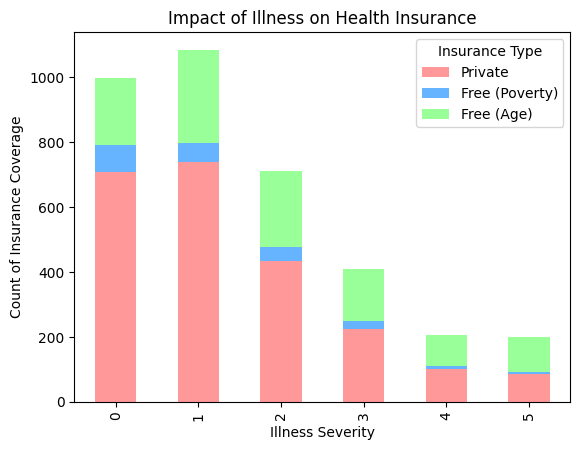

In [82]:
# Impact of illness on health insurance
illness_insurance = df.groupby('illness')[['private', 'freepoor', 'freerepat']].apply(lambda x: (x == 'yes').sum())
illness_insurance.plot(kind='bar', stacked=True, color=['#FF9999', '#66B3FF', '#99FF99'])
plt.title("Impact of Illness on Health Insurance")
plt.xlabel("Illness Severity")
plt.ylabel("Count of Insurance Coverage")
plt.legend(title="Insurance Type", labels=["Private", "Free (Poverty)", "Free (Age)"])
plt.show()


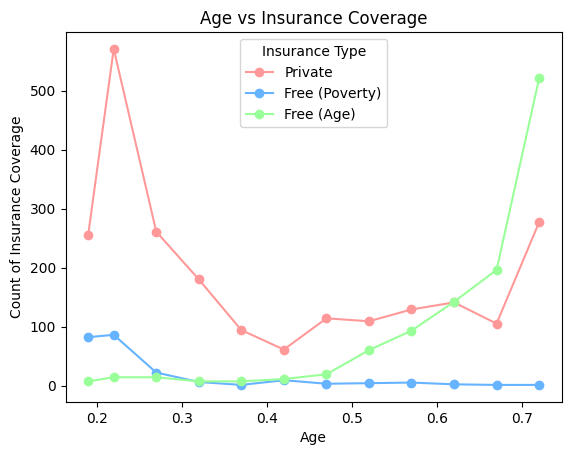

In [83]:
# Age vs insurance coverage
age_insurance = df.groupby('age')[['private', 'freepoor', 'freerepat']].apply(lambda x: (x == 'yes').sum())
age_insurance.plot(kind='line', marker='o', color=['#FF9999', '#66B3FF', '#99FF99'])
plt.title("Age vs Insurance Coverage")
plt.xlabel("Age")
plt.ylabel("Count of Insurance Coverage")
plt.legend(title="Insurance Type", labels=["Private", "Free (Poverty)", "Free (Age)"])
plt.show()


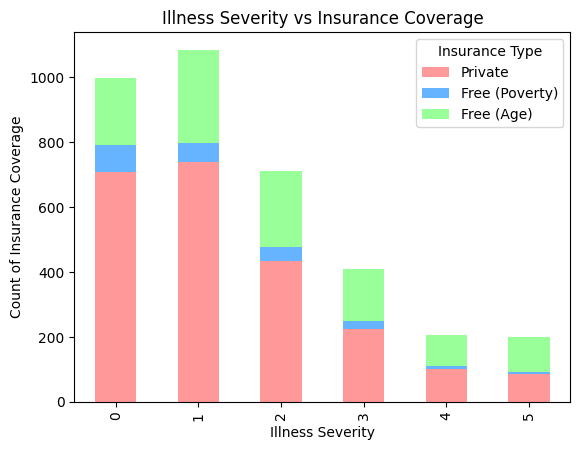

In [84]:
# Illness severity vs insurance coverage
illness_coverage = df.groupby('illness')[['private', 'freepoor', 'freerepat']].apply(lambda x: (x == 'yes').sum())
illness_coverage.plot(kind='bar', stacked=True, color=['#FF9999', '#66B3FF', '#99FF99'])
plt.title("Illness Severity vs Insurance Coverage")
plt.xlabel("Illness Severity")
plt.ylabel("Count of Insurance Coverage")
plt.legend(title="Insurance Type", labels=["Private", "Free (Poverty)", "Free (Age)"])
plt.show()


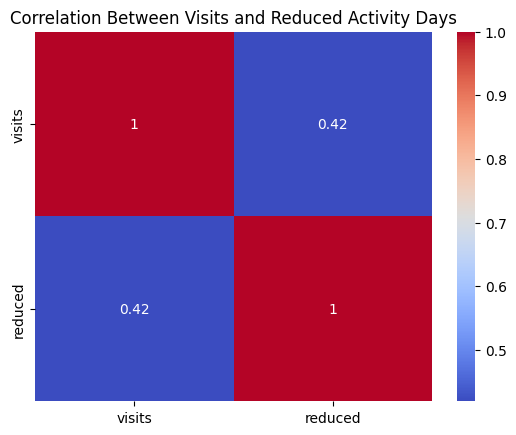

In [85]:
# Correlation between visits and reduced activity days
sns.heatmap(df[['visits', 'reduced']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Visits and Reduced Activity Days")
plt.show()
